In [135]:
#importation de packages
import numpy as np
import pandas as pd
from pandas.errors import ParserError
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#df=pd.read_csv("scorm_tracking_copy.csv",sep=";")
#df

In [206]:
class Tp2:
    
    def __init__(self):
        
        try:
            self.df=pd.read_csv("scorm_tracking_copy.csv",sep=";")
        except ParserError:
            print("veuillez changer sep")
        
        
    def myFirstData(self,ascendant=False):
        apprenant=self.df.groupby(['object_id']).actor.nunique()
        session=self.df.groupby(['object_id']).session_uuid.count()
        smin=self.df.groupby(['object_id']).score.min()
        smax=self.df.groupby(['object_id']).score.max()
        tdr50=self.df[(self.df['score'] >= 50)].groupby(['object_id']).actor.nunique()
        taux_de_reussite=(tdr50/apprenant)*100
        ntd=taux_de_reussite.sort_values(ascending=False)
        fin=ntd.fillna(0)
        z={'actor':apprenant, 'session':session, 'score min':smin, 'score max':smax,'taux_de_reussite':fin }
        self.new_df=pd.DataFrame(z)
        self.new_df.sort_values(by='taux_de_reussite', ascending=ascendant, inplace=True)
        return self.new_df
    
    def fct2D_array(self):
        self.myFirstData()
        self.new_df.sort_values(by='taux_de_reussite', ascending=False, inplace=True)
        top10 = self.new_df.head(10)
        nmp=top10.to_numpy()
        top10.index
        return nmp
    def second_fct(self):
        self.myFirstData()
        first=self.new_df.head(1)
        first.index[0]
        last=self.new_df.tail(1)
        last.index[0]
        data_first=self.df.loc[self.df['object_id']==first.index[0]].groupby('actor').agg({'session_uuid':['count'], 'temps':['sum'],  'score':['max']})
        top_viz=data_first.reset_index()
        data_first['Resultat_final']= 0
        data_first.loc[data_first.score['max']>=50, 'Resultat_final']=1
        top_first=data_first.head(10)
        last=self.df.loc[self.df['object_id']==last.index[0]].groupby('actor').agg({'session_uuid':['count'], 'temps':['sum'],  'score':['max']})
        last['Resultat_final']= 0
        data_first.loc[data_first.score['max']>=50, 'Resultat_final']=1
        data_first.head(10)
        return top_first
    
    def fct_top10(self):
        df = self.myFirstData().head(10)
        for index in df.index:
            data_first=self.df.loc[self.df['object_id']==index].groupby('actor').agg({'session_uuid':['count'], 'temps':['sum'],  'score':['max']})
            dt1=data_first.reset_index()
            dt2=pd.concat([dt1.temps, dt1.score], axis=1)
            
            dt2.sort_values(by=['sum'], inplace=True)
            dt2=dt2.to_numpy()
            x=dt2[:,0]
            y=dt2[:,1]
            plt.plot(x,y,label=index)
   

        plt.title('Score Maximum par Minuite')
        plt.xlabel('Temps par minuite')
        plt.ylabel('Score Max')
        plt.legend()
        plt.show()

    
    def fct_diagramme(self):
        top10=self.myFirstData().head(10)
        diagra=top10.taux_de_reussite.to_numpy()
        z=[i for i in top10.index] 
        plt.barh(z, diagra, )
        plt.show()
        
    
    def fct_top3(self):
        top3=self.myFirstData().head(3)
        fig, axs  = plt.subplots(1, 3, figsize=(15,5))
        for i in range(top3.index.size):
            add_rang=self.df.loc[self.df['object_id']==top3.index[i]].groupby('actor').agg({'score': 'max'})
            add_rang.sort_values(['score'],ascending=False, inplace=True)
            add_rang['rang']=[i for i in range(1, add_rang.score.size +1)]
            add_rang.reset_index()
            kk=add_rang.to_numpy()
            x=kk[:,0]
            y=kk[:,1]
            axs[i].plot(x,y)
        
            axs[i].set_title(top3.index[i])
            axs[i].set_xlabel('rang')
            axs[i].set_ylabel('score')
    def fct_nuage(self):
        self.myFirstData()
        tms_modules=self.df.groupby(['object_id']).temps.sum()
        td_reussite = self.new_df.taux_de_reussite
        
        kd={'taux_de_reussite':td_reussite, 'temps_glo':tms_modules}
        ts_modules=pd.DataFrame(kd)
        #ts_modules=df.loc[df['object_id']==object].groupby('actor').agg({'score': 'max'})
        ts_modules.sort_values(['taux_de_reussite'],ascending=False, inplace=True)
        ts_modules['rang']=[i for i in range(1, ts_modules.taux_de_reussite.size +1)]
        ts_modules.reset_index()
        ts_nmp=ts_modules.to_numpy()
        x=ts_nmp[:,2]
        y=ts_nmp[:,1]

        plt.scatter(x,y)

        plt.title('Score Maximum par Minuite')
        plt.xlabel('Temps Global')
        plt.ylabel('Taux de reussite')
        plt.show()
    def fct_camembert(self):
        self.myFirstData()
        module_count=self.new_df.size
        classeA=self.new_df.loc[self.new_df['taux_de_reussite']>= 80].size
        classeB=self.new_df.loc[(self.new_df['taux_de_reussite']>=60) & (self.new_df['taux_de_reussite'] < 80)].size
        classeC=self.new_df.loc[(self.new_df['taux_de_reussite']>=50) & (self.new_df['taux_de_reussite'] < 60)].size
        classeD=self.new_df.loc[self.new_df['taux_de_reussite']<50].size
        classeA=classeA/module_count
        classeB=classeB/module_count
        classeC=classeC/module_count
        classeD=classeD/module_count
        classes=np.array([classeA, classeB, classeC, classeD])
        label=['A', 'B', 'C', 'D']
        plt.pie(classes, labels=label, explode=[0, 0, 0, 0], shadow=True, autopct = "%0.2f%%", radius = 1.2, )
        plt.legend()
        plt.show()


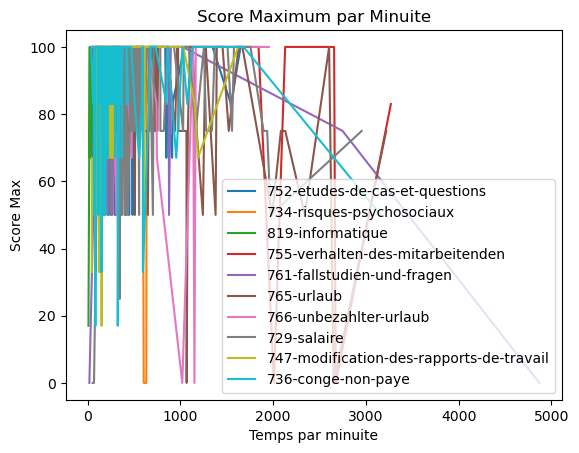

In [208]:
#creation d'object
tp2=Tp2()
#tp2.myFirstData()
#tp2.fct2D_array()
#tp2.second_fct()
tp2.fct_top10()
#tp2.fct_diagramme()
#tp2.fct_top3()
#tp2.fct_nuage()
#tp2.fct_camembert()